# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `8` | `Questions`

> Hi, Team. 👋

> As discussed, throughout our semester, I’ve been doing my best to pace your learning while expanding your expertise and providing a novel framework that you could deploy in real-world practices. I kept revising all the lecture materials and exercise problem-sets so they aligned with your level of understanding.

> As you will see from the class email, I have revised the current exercise questions more than usual, as I found that the submission rate for the previous exercise problem-sets was less than ideal.

> This week’s exercise questions, as always, are intended to help you integrate what you have learned in the course, rather than test you. Please do as much as you can and feel free to submit your work, so that I can capture where you stand and pace your learning more precisely. 

> The questions below aren’t difficult as they ask incremental expansion of (with logical progression of) some of the questions you solved in previous exercise problem-sets.

> Hope you find them helpful!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. ### 

### The first expanded question is where you will execute principal component analysis (PCA) for portfolio management.
    
    As noted in the lesson, the principal components of the correlation matrix capture 
    most of the covariation among assets in descending order and are mutually uncorrelated.
    
    Importantly, we can employ standardized principal components as portfolio weights.
    
    Randomly choose 40 stock tickers among the stock tickers from below DF.
    
> Set the seed number 627 for an identical set of stock tickers at the starting point of your analysis for everyone.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period to “the market”, 
    assess the performance of other portfolios that capture different return patterns.
    
> Please use 80% of your data for PCA and 20% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 11 years between 2009 and 2019.

In [3]:
list_of_tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

list_of_tickers

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [4]:
list_of_tickers["Symbol"]

0       MMM
1       AOS
2       ABT
3      ABBV
4      ABMD
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

### Below are the lines of code that lead to an answer:

In [5]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

In [6]:
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import seaborn as sns

In [7]:
import random

In [8]:
stock_indexes = []

random.seed(627)

def random_generator(x):
    for i in range(x):
        stock_indexes.append(random.randint(0,503))
    return stock_indexes

random_generator(40)

[475,
 128,
 374,
 300,
 54,
 64,
 115,
 9,
 127,
 56,
 215,
 500,
 82,
 107,
 332,
 261,
 273,
 227,
 284,
 362,
 99,
 431,
 171,
 134,
 413,
 381,
 84,
 81,
 135,
 372,
 141,
 343,
 36,
 53,
 422,
 244,
 293,
 400,
 159,
 492]

In [9]:
import pandas_datareader.data as web
import datetime

start = datetime.date(2009, 1, 2)
end = datetime.date(2019, 12, 31)

stocks_picked = pd.DataFrame()

# stocks_picked['V'] = web.DataReader('V', 
#                                     'yahoo', 
#                                     start, 
#                                     end)['Adj Close']
# stocks_picked

In [10]:
def extract(ticker):
    stocks_picked[ticker] = web.DataReader(ticker, 
                                            'yahoo', 
                                            start, 
                                            end)['Adj Close']
    return stocks_picked

In [11]:
# extract('CPRT')

In [12]:
stock_symbols = []

for index in stock_indexes:
    stock_symbols.append(list_of_tickers.Symbol[index])


In [13]:
extract(stock_symbols).tail()

C:\Users\bryan\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'CEG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\bryan\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BF.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


,V,COO,PNW,MMC,ADSK,WRB,CLX,ADP,CEG,AVB,...,DRI,NOC,AMP,ATO,SEDG,IBM,LUMN,RSG,DTE,WMB
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,184.304337,321.886200,78.091675,106.496605,183.910004,43.543644,141.101425,160.516586,187.973297,165.551743,...,157.836349,103.346718,95.199997,112.550049,10.410904,85.247002,99.607574,19.847858,NaN,NaN
2019-12-26,185.866623,319.847260,78.170776,106.754318,184.240005,43.575470,141.527115,160.932266,188.316788,164.968491,...,157.798660,103.271957,95.559998,112.491676,10.371349,85.227966,99.910698,19.822882,NaN,NaN
2019-12-27,186.092667,320.946686,78.082901,106.935677,185.380005,43.639114,142.073044,161.329056,188.786865,164.320419,...,156.885834,102.926178,94.260002,112.791855,10.616591,85.837021,100.167160,19.639727,NaN,NaN
2019-12-30,184.559799,319.287598,78.434433,106.744774,183.300003,43.677296,141.471588,160.214249,189.060028,162.950241,...,156.283569,103.243919,94.000000,110.740646,10.363438,85.646698,100.275970,19.315029,NaN,NaN
2019-12-31,184.628555,321.126617,79.032013,106.343872,183.460007,43.976410,142.082321,161.073990,190.954102,163.265015,...,156.763504,104.543007,95.089996,111.766235,10.450459,85.680145,100.936584,19.747952,NaN,NaN


<AxesSubplot:title={'center':'Correlation Matrix'}>

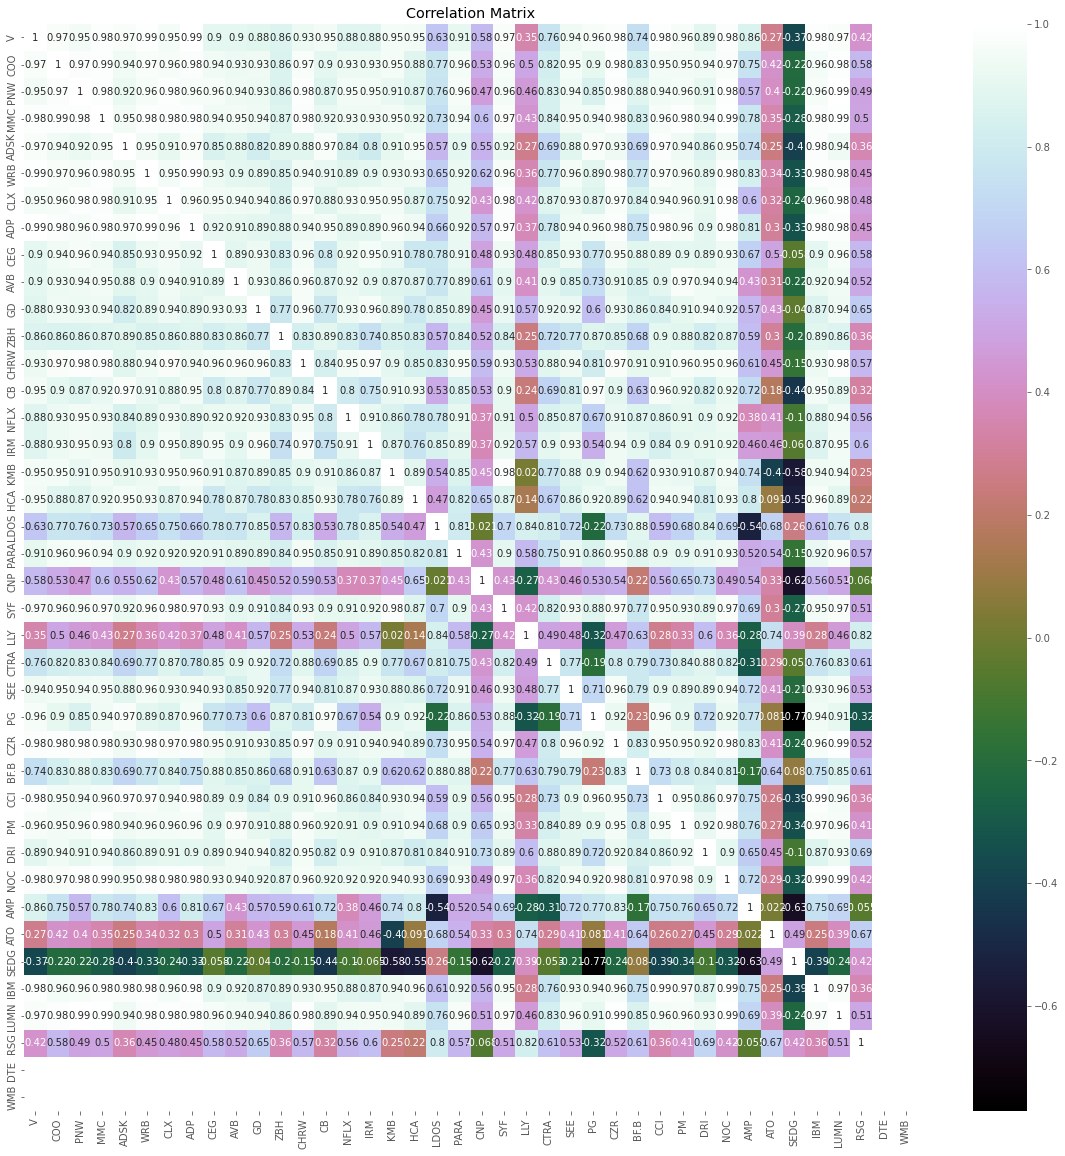

In [14]:
corr = stocks_picked.corr()

plt.figure(figsize = (20,20))

plt.title("Correlation Matrix")

sns.heatmap(corr,
            annot = True,
            cmap = "cubehelix")

In [15]:
stocks_picked.isnull().any()

V       False
COO     False
PNW     False
MMC     False
ADSK    False
WRB     False
CLX     False
ADP     False
CEG     False
AVB     False
GD      False
ZBH     False
CHRW    False
CB      False
NFLX    False
IRM     False
KMB      True
HCA     False
LDOS    False
PARA    False
CNP      True
SYF     False
LLY     False
CTRA    False
SEE     False
PG       True
CZR     False
BF.B    False
CCI     False
PM      False
DRI     False
NOC     False
AMP      True
ATO     False
SEDG    False
IBM     False
LUMN    False
RSG     False
DTE      True
WMB      True
dtype: bool

In [16]:
np.isinf(stocks_picked).any()

V       False
COO     False
PNW     False
MMC     False
ADSK    False
WRB     False
CLX     False
ADP     False
CEG     False
AVB     False
GD      False
ZBH     False
CHRW    False
CB      False
NFLX    False
IRM     False
KMB     False
HCA     False
LDOS    False
PARA    False
CNP     False
SYF     False
LLY     False
CTRA    False
SEE     False
PG      False
CZR     False
BF.B    False
CCI     False
PM      False
DRI     False
NOC     False
AMP     False
ATO     False
SEDG    False
IBM     False
LUMN    False
RSG     False
DTE     False
WMB     False
dtype: bool

In [17]:
# stocks_picked['CSX']

In [18]:
daily_returns = stocks_picked.pct_change()[1:]
daily_returns = daily_returns.dropna(axis=1)

daily_returns

,V,COO,PNW,MMC,ADSK,WRB,CLX,ADP,CEG,AVB,...,BF.B,CCI,PM,DRI,NOC,ATO,SEDG,IBM,LUMN,RSG
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-05,0.007111,0.017675,0.015700,-0.016840,0.009671,0.001308,-0.002483,-0.010146,-0.028160,-0.000335,...,0.007933,-0.027082,0.057940,0.005833,-0.008692,-0.006295,-0.009500,0.021539,0.010218,0.024294
2009-01-06,0.070420,0.034210,-0.026457,0.017537,-0.001437,-0.056172,-0.012449,0.020250,0.056226,0.024941,...,-0.027659,0.006959,-0.016430,0.039768,0.003758,0.027758,0.003908,0.008981,-0.009021,0.045513
2009-01-07,-0.021698,-0.022392,-0.001832,-0.030461,-0.037410,-0.036679,-0.016388,-0.017152,-0.031679,-0.039196,...,-0.012488,-0.044538,-0.027428,-0.083665,-0.009152,-0.016138,-0.016985,-0.021672,-0.015173,-0.026977
2009-01-08,-0.010646,0.004685,0.011013,-0.008681,-0.043348,0.035920,-0.003295,0.012466,-0.034401,0.006459,...,0.000000,0.006191,0.023113,0.034782,-0.007137,-0.006948,0.032758,0.012658,0.002801,0.015753
2009-01-09,-0.002511,-0.020726,-0.004539,-0.023770,-0.038021,-0.020805,-0.028288,-0.049249,-0.047328,-0.021787,...,-0.008900,-0.034383,-0.018032,-0.042017,0.012685,-0.028447,-0.031370,-0.014453,-0.005587,-0.017369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.002619,0.004303,-0.001349,0.002606,0.005412,0.000292,0.000919,-0.000647,0.004105,-0.005119,...,0.001046,-0.001840,-0.002988,0.002630,-0.004770,-0.004205,-0.002274,0.001901,-0.004660,-0.004177
2019-12-26,0.008477,-0.006334,0.001013,0.002420,0.001794,0.000731,0.003017,0.002590,0.001827,-0.003523,...,-0.000929,0.003779,0.002535,-0.000239,-0.000723,-0.000519,-0.003799,-0.000223,0.003043,-0.001258
2019-12-27,0.001216,0.003437,-0.001124,0.001699,0.006188,0.001461,0.003857,0.002466,0.002496,-0.003928,...,0.003255,-0.008264,-0.004368,-0.005785,-0.003348,0.002668,0.023646,0.007146,0.002567,-0.009240


In [19]:
size = int(len(daily_returns) * 0.80)

training_set = daily_returns[:size]
testing_set = daily_returns[size:]

print('Training Set:', training_set.shape)
print('Testing Set:', testing_set.shape)

Training Set: (2213, 34)
Testing Set: (554, 34)


In [20]:
# d = np.isnan(training_set).any()
# d

In [21]:
# d = np.isinf(daily_returns).any()
# d

In [22]:
scaler = StandardScaler().fit(training_set)

scaled_returns = pd.DataFrame(scaler.fit_transform(training_set), 
                            columns = training_set.columns,
                              index = training_set.index)

scaled_returns

,V,COO,PNW,MMC,ADSK,WRB,CLX,ADP,CEG,AVB,...,BF.B,CCI,PM,DRI,NOC,ATO,SEDG,IBM,LUMN,RSG
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-05,0.362071,0.928158,1.345735,-1.345547,0.385739,0.062519,-0.294950,-0.924373,-1.501932,-0.079227,...,0.628149,-1.613571,4.309507,0.204365,-0.818753,-0.536502,-0.616277,1.643482,0.849391,0.853480
2009-01-06,4.181332,1.865668,-2.430847,1.285698,-0.110751,-4.463804,-1.261228,1.665328,2.871630,1.739364,...,-2.445428,0.356538,-1.326117,1.696137,0.256982,2.188934,0.231819,0.657364,-0.873201,1.629036
2009-01-07,-1.375853,-1.343629,-0.224895,-2.388089,-1.718663,-2.928758,-1.643118,-1.521305,-1.684311,-2.875283,...,-1.135324,-2.623854,-2.159526,-3.730008,-0.858448,-1.324211,-1.089715,-1.749553,-1.423980,-1.020423
2009-01-08,-0.709139,0.191631,0.925832,-0.721038,-1.984081,2.788093,-0.373694,1.002125,-1.825405,0.409611,...,-0.056892,0.312134,1.670382,1.476965,-0.684332,-0.588761,2.056697,0.946123,0.185306,0.541322
2009-01-09,-0.218372,-1.249147,-0.467380,-1.875926,-1.745964,-1.678753,-2.797010,-4.255930,-2.495388,-1.622735,...,-0.825433,-2.036140,-1.447457,-1.899140,1.028177,-2.309355,-1.999640,-1.182743,-0.565684,-0.669266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-11,0.568351,0.786266,0.565699,0.025917,0.533899,-0.122308,0.936271,-0.821501,0.387245,0.039648,...,-0.739231,-0.002420,0.399461,0.116496,0.244085,-0.506955,-0.171000,-0.122169,0.270405,0.123783
2017-10-12,-0.250478,-0.038221,0.882750,-0.065748,0.111793,-0.098986,0.086937,0.316716,0.239752,0.245734,...,0.147177,-0.141021,0.814817,0.165078,0.523607,-0.352528,0.234270,0.386192,0.726182,-0.022312
2017-10-13,0.240004,-0.472425,0.011031,0.245680,0.193875,0.158654,0.361177,0.142590,-0.145575,-0.183078,...,-0.464074,0.107227,-0.659534,0.043014,-0.565488,0.005455,-0.326162,-0.467151,-0.696524,-0.397858


### <font color = red> Answer 1 is presented in the cell below: </font>

In [23]:
pca = PCA()

principal_component = pca.fit(training_set)
pca.components_[0]

array([-0.165, -0.15 , -0.109, -0.151, -0.249, -0.14 , -0.083, -0.138,
       -0.214, -0.161, -0.146, -0.152, -0.163, -0.199, -0.167, -0.087,
       -0.13 , -0.305, -0.13 , -0.113, -0.26 , -0.21 , -0.09 , -0.16 ,
       -0.098, -0.159, -0.144, -0.297, -0.117, -0.127, -0.129, -0.135,
       -0.113, -0.29 ])

In [24]:
def PCWeights():
    """
    Principal Compoments Weights
    """
    weights = pd.DataFrame()
    
    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                   )
        
    weights = weights.values.T
    return weights

weights = PCWeights()
weights[0]

array([0.03 , 0.027, 0.02 , 0.028, 0.045, 0.026, 0.015, 0.025, 0.039,
       0.029, 0.027, 0.028, 0.03 , 0.036, 0.03 , 0.016, 0.024, 0.056,
       0.024, 0.021, 0.047, 0.038, 0.016, 0.029, 0.018, 0.029, 0.026,
       0.054, 0.021, 0.023, 0.024, 0.025, 0.021, 0.053])

array([[<AxesSubplot:title={'center':'Portfolio 0'}>],
       [<AxesSubplot:title={'center':'Portfolio 1'}>],
       [<AxesSubplot:title={'center':'Portfolio 2'}>],
       [<AxesSubplot:title={'center':'Portfolio 3'}>]], dtype=object)

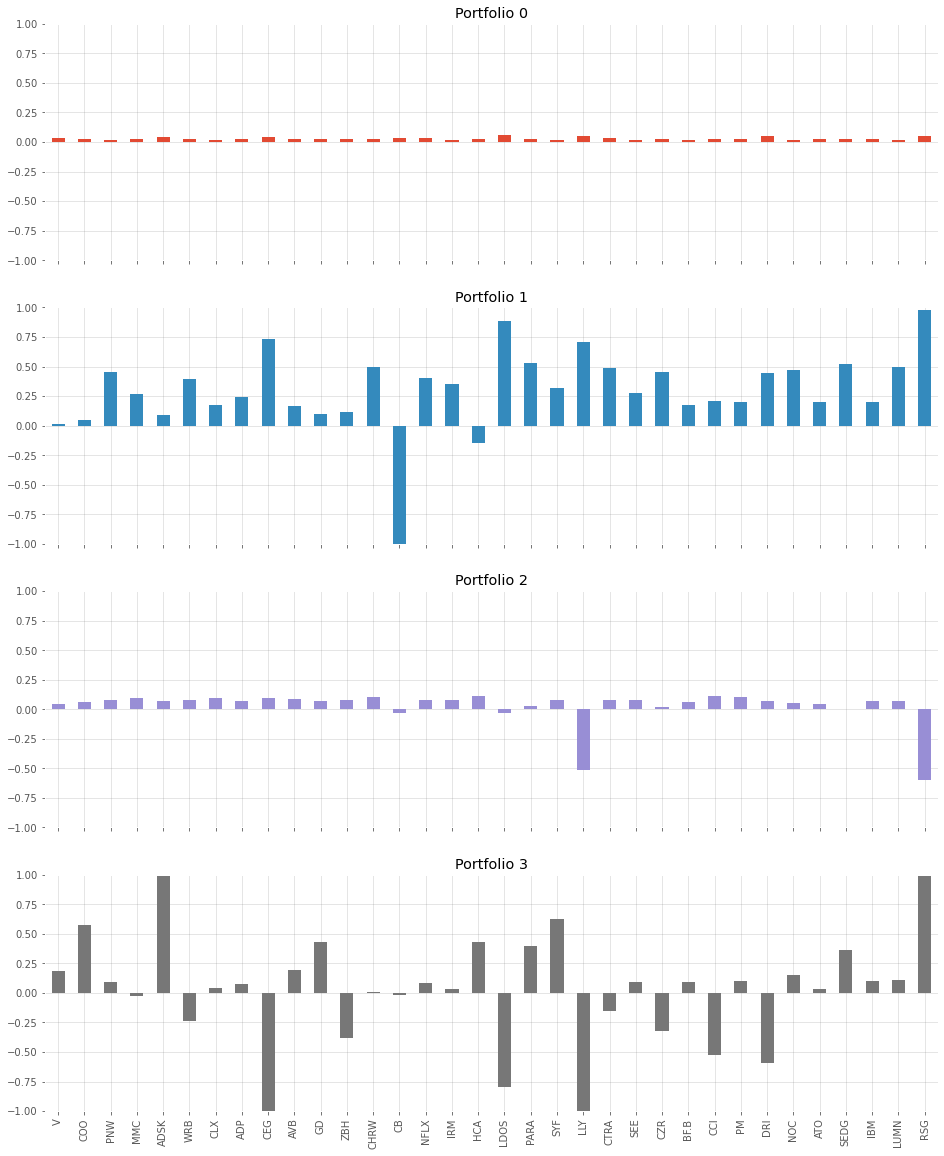

In [25]:
NumComponents = 4

topPortfolios = pd.DataFrame(pca.components_[:NumComponents],
                             columns = training_set.columns)

eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis = 0)

eigen_portfolios.index = [f"Portfolio {i}" for i in range( NumComponents)
                          ]

np.sqrt(pca.explained_variance_)

eigen_portfolios.T.plot.bar(subplots = True,
                            layout = (int(NumComponents), 1),
                            legend = False,
                            sharey = True,
                            ylim = (-1, 1),
                            figsize = (16, 20)
                           )

<AxesSubplot:>

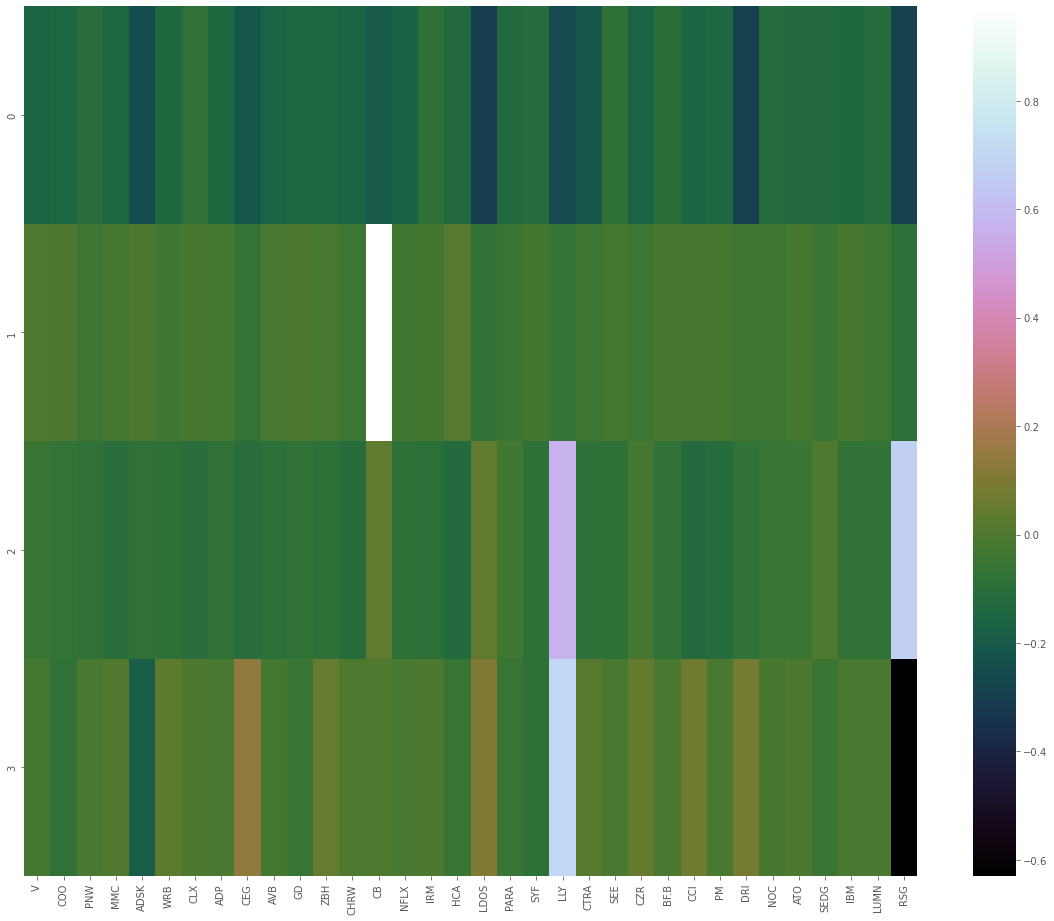

In [26]:
plt.figure(figsize = (20, 16))

sns.heatmap(topPortfolios,
            cmap = "cubehelix")

In [27]:
def sharpe_ratio(ts_returns, periods_per_year = 252):
    
    n_years = ts_returns.shape[0]/periods_per_year
    
    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                 ) - 1
    
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    
    annualized_sharpe = annualized_return / annualized_vol
    
    return annualized_return, annualized_vol, annualized_sharpe

In [28]:
def FindOptimalPortfolio():
    
    n_portfolios = len(pca.components_)
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = training_set.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i])
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(training_set.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = training_set.index)
        
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    results = pd.DataFrame(data = {"Return": annualized_ret, "Vol": annualized_vol, "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
    
    print(results.head(15)
         )

In [29]:
FindOptimalPortfolio()

Our Eigen Portfolio #0 with the highest Sharpe. Return 20.02%, vol = 15.73%, Sharpe = 1.27
      Return        Vol    Sharpe
0   0.200234   0.157317  1.272811
4   0.229932   0.251076  0.915786
2   0.169428   0.268344  0.631383
13  0.449307   0.745252  0.602893
5   0.190206   0.892119  0.213207
18  0.215944   1.118105  0.193134
10  0.018318   0.818450  0.022382
30 -1.000000  19.249468 -0.051949
25 -1.000000   8.725286 -0.114609
9  -0.161727   1.109101 -0.145818
22 -1.000000   5.790457 -0.172698
31 -0.999993   4.557135 -0.219435
32 -0.999835   4.280085 -0.233602
14 -0.999605   3.585372 -0.278801
19 -0.174453   0.584355 -0.298539


C:\Users\bryan\AppData\Local\Temp\ipykernel_19740\3473044067.py:5: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
C:\Users\bryan\AppData\Local\Temp\ipykernel_19740\3473044067.py:5: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
C:\Users\bryan\AppData\Local\Temp\ipykernel_19740\3473044067.py:5: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
C:\Users\bryan\AppData\Local\Temp\ipykernel_19740\3473044067.py:5: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
C:\Users\bryan\AppData\Local\Temp\ipykernel_19740\3473044067.py:5: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
C:\Users\bryan\AppData\Local\Temp\ipykernel_19740\3473044067

In [30]:
stock_tickers = pd.DataFrame(list_of_tickers.Symbol.iloc[stock_indexes])
stock_tickers

,Symbol
475,V
128,COO
374,PNW
300,MMC
54,ADSK
64,WRB
115,CLX
9,ADP
127,CEG
56,AVB


In [31]:
weights = PCWeights()

portfolio = pd.DataFrame()

def VisualizeEigen(weights,
                   plot = False,
                   portfolio = portfolio):
    
    portfolio = pd.DataFrame(data = {"weights": weights.squeeze()*100},
                             index = daily_returns.columns)
    
    portfolio.sort_values(by = ["weights"],
                          ascending = False,
                          inplace = True)
    
    if plot:
        
        print("Total weights of our Eigen-Portfolio: %2.f" % np.sum(portfolio)
             )
        
        portfolio.plot(figsize = (14, 10),
                       title = "Eigen-Portfolio Weights",
                       rot = 60,
                       xticks = range(0, len(daily_returns.columns), 1)
                      )
        
        plt.show()
        
    return portfolio

Total weights of our Eigen-Portfolio: 100


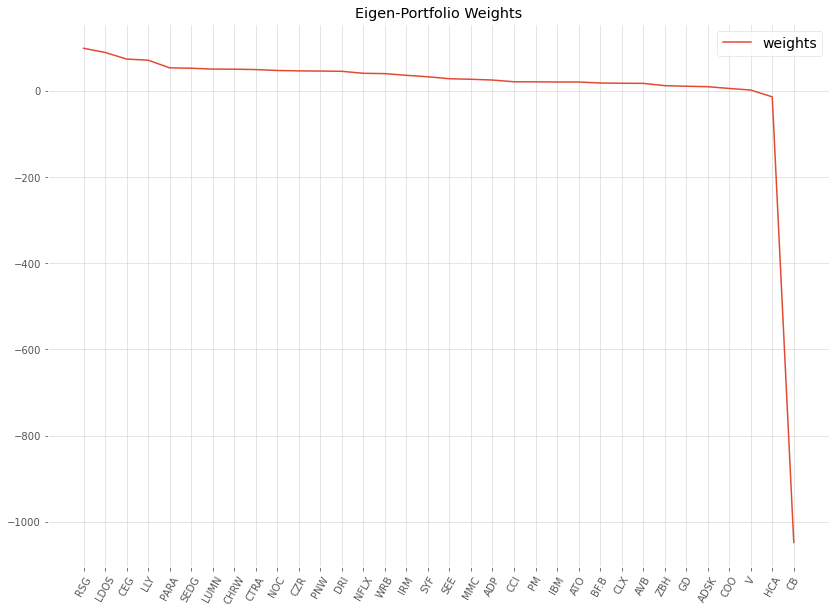

,weights
RSG,98.213996
LDOS,88.568316
CEG,73.182397
LLY,70.636065
PARA,52.829628
SEDG,51.907626
LUMN,49.966499
CHRW,49.665092
CTRA,48.871853
NOC,46.750097


In [32]:
VisualizeEigen(weights[1],
               True)

In [33]:
def Backtest(eigen):
    
    eigen_prtfi = pd.DataFrame(data = {"weights": eigen.squeeze()},
                               index = daily_returns.columns)
    
    eigen_prtfi.sort_values(by = ["weights"],
                            ascending = False,
                            inplace = True)
    
    eigen_prti_returns = np.dot(testing_set.loc[:, eigen_prtfi.index], eigen)
    
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(),
                                        index = testing_set.index)
    
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
    
    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatality = %.2f%%\nSharpe = %.2f" % 
          (returns*100, vol*100, sharpe)
         )
        
    equal_weight_return = (testing_set * (1 / len(pca.components_)
                                         )
                           ).sum(axis = 1)
    
    df_plot = pd.DataFrame({"Eigen-Portfolio Return": eigen_portfolio_returns,
                            "Equal Weight Index": equal_weight_return},
                           index = testing_set.index)
    
    np.cumprod(df_plot + 1).plot(title = "RETURNS of the equal weighted index versus Eigen-portfolio",
                                 figsize = (16, 8)
                                )
    plt.show()

Our PCA-based Portfolio:
Return = 12.35%
Volatality = 12.31%
Sharpe = 1.00


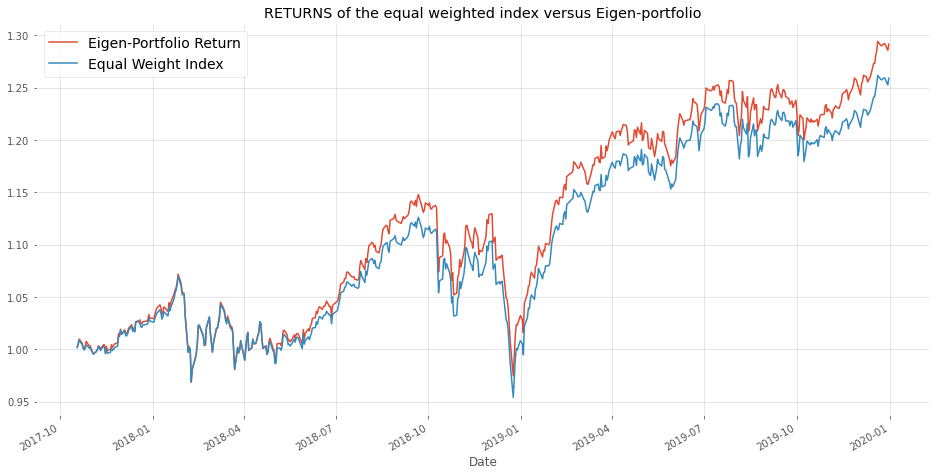

In [34]:
Backtest(weights[0])

Our PCA-based Portfolio:
Return = -0.03%
Volatality = 72.18%
Sharpe = -0.00


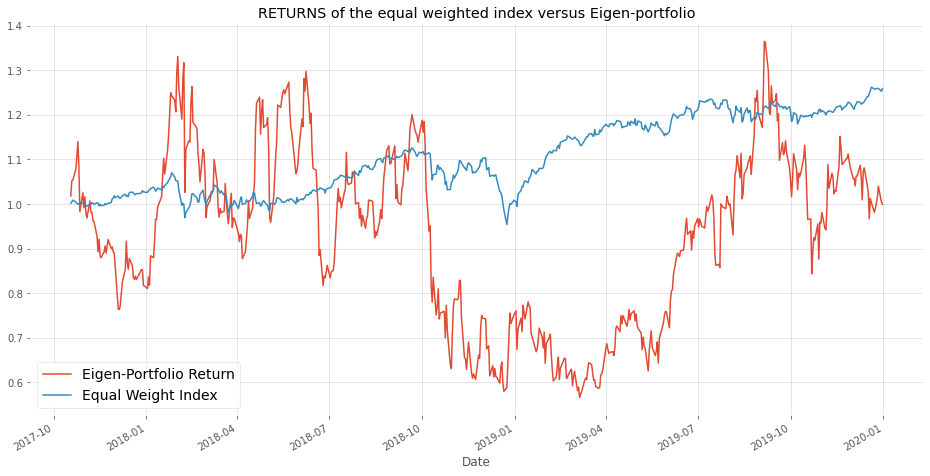

In [35]:
Backtest(weights[10])

Our PCA-based Portfolio:
Return = -75.94%
Volatality = 162.61%
Sharpe = -0.47


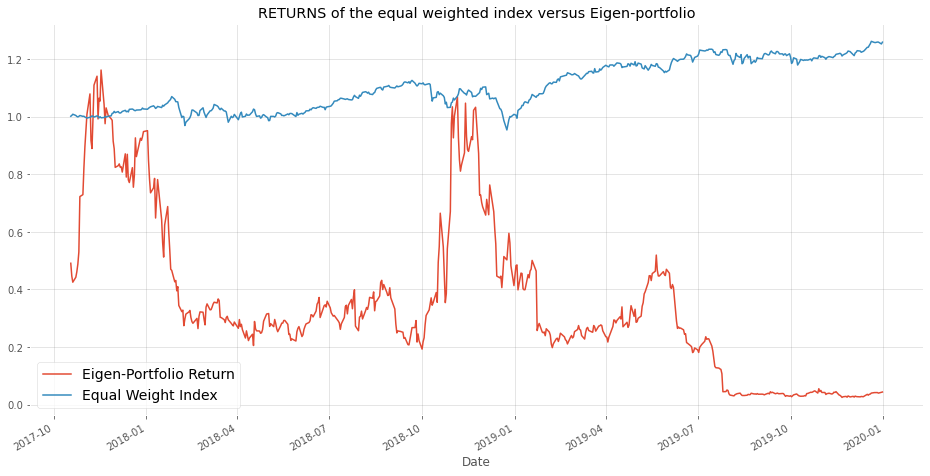

In [36]:
Backtest(weights[3])

## 👇 <font color = "purple"> Bigger Question 2. The next question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).

> The primary advantage AGNES has over other clustering methods is that you don’t need to guess how many clusters there might be.
    
> Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It’s then up to a quant to choose a cut-off threshold and decide how many clusters are present.

> Linkage does the actual clustering in one line of code, and returns a list of the clusters.

> There are different options for measuring the distance. We will choose the average distance measurement option, but others are possible (ward, single, centroid, etc.).

### The best way to visualize an agglomerate clustering algorithm is through a dendrogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. 
    
### The distance between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.
    
### <font color = green> Using Dow data, based on what you learned in class, run the above analysis and come up with a dendrogram. According to the dendrogram, which of the stocks are most correlated? Also based on the dendrogram, please identify two stocks that are not well correlated.

### Below are the lines of code that lead to an answer:

In [37]:
# from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, ward
# from scipy.spatial.distance import pdist
# from sklearn.metrics import adjusted_mutual_info_score
# from sklearn import cluster, covariance, manifold


### <font color = red> Answer 2 is presented in the cell below: </font>

In [38]:
dow = pd.read_csv("dow_pca.csv", 
                  index_col = 0)

dow


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-25,195.900000,100.770000,157.760000,364.200000,136.860000,113.220000,46.130000,47.370000,111.090000,57.76,...,80.610000,40.298248,93.600000,124.980000,115.810000,268.050000,56.400000,138.67,96.940000,71.890000
2019-01-28,193.200000,100.380000,156.300000,362.970000,124.370000,112.170000,45.750000,47.170000,110.810000,58.13,...,80.320000,39.197582,93.520000,125.030000,115.080000,266.770000,55.070000,135.99,97.060000,71.580000
2019-01-29,196.950000,100.960000,154.680000,364.910000,126.530000,111.830000,45.960000,47.400000,110.900000,58.52,...,80.220000,40.427155,93.540000,124.820000,117.840000,267.340000,53.280000,135.00,96.710000,71.500000


In [39]:
dow_returns = dow.pct_change()[1:]
dow_returns = dow_returns.dropna(axis=1)

dow_returns

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.039733,-0.037838,-0.084331,-0.001493,-0.012955,0.000000,-0.056429,0.003378,0.058568,-0.019155,...,-0.033802,-0.054447,-0.037327,-0.019590,-0.013333,-0.040960,-0.012837,-0.032366,-0.037420,-0.037115
2000-01-05,0.050976,-0.005122,0.014634,0.070022,0.037708,0.021643,0.007843,0.010985,0.035409,0.049733,...,0.010567,0.057802,0.018247,-0.008563,0.009828,-0.009343,-0.002262,0.033448,-0.023325,0.009091
2000-01-06,0.058268,0.000000,-0.086538,0.002795,0.036539,0.038741,-0.027237,-0.001052,-0.034198,0.056555,...,-0.033477,-0.005194,0.033920,0.035509,0.001825,0.036713,0.036645,-0.005088,0.014011,-0.027027
2000-01-07,0.019841,0.013972,0.047368,0.029029,0.032539,0.017577,0.059000,0.065789,-0.015808,-0.002935,...,0.013091,0.000000,0.067781,0.079703,0.039769,0.039636,0.117165,-0.007426,0.075522,0.025556
2000-01-10,-0.004864,0.014436,-0.017588,-0.013992,-0.032827,-0.026907,0.036827,-0.031934,0.152586,-0.014010,...,0.007268,0.016917,-0.001739,-0.005150,-0.018102,0.009844,-0.017289,-0.005271,-0.018248,0.029252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-25,0.017557,0.010529,0.033137,0.016552,0.031116,-0.002555,0.011401,-0.006710,0.004885,0.004482,...,0.009134,0.002113,-0.007570,-0.007423,0.004824,0.002163,0.007215,-0.011740,-0.014437,0.007992
2019-01-28,-0.013783,-0.003870,-0.009255,-0.003377,-0.091261,-0.009274,-0.008238,-0.004222,-0.002520,-0.006693,...,-0.019502,-0.003598,-0.027313,-0.000855,0.000400,-0.006303,-0.004775,-0.023582,0.001238,-0.004312
2019-01-29,0.019410,0.005778,-0.010365,0.005345,0.017368,-0.003031,0.004590,0.004876,0.000812,0.003790,...,-0.020365,-0.001245,0.031369,0.000214,-0.001680,0.023983,0.002137,-0.032504,-0.003606,-0.001118


In [40]:
dow_data = pd.DataFrame(dow_returns.mean() * 252, columns = ['Annual Returns'])
dow_data['Annual Volatility'] = dow_returns.std() * np.sqrt(252)
dow_data

,Annual Returns,Annual Volatility
MMM,0.126309,0.229568
AXP,0.118604,0.354868
AAPL,0.290322,0.409492
BA,0.185365,0.299863
CAT,0.167952,0.321688
CVX,0.119901,0.254099
CSCO,0.080959,0.391052
KO,0.075859,0.205860
DIS,0.126220,0.298514
XOM,0.087974,0.241293


In [41]:
scaler = StandardScaler().fit(dow_data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(dow_data),
                               columns = dow_data.columns, 
                               index = dow_data.index)

rescaledDataset.head()
X = rescaledDataset

In [42]:
# Calulate linkage using unweighted average group pair
# Unsure whether to use the weighted or unweighted average

Z = linkage(X, method = 'average')
Z[0]

array([20.   , 25.   ,  0.044,  2.   ])

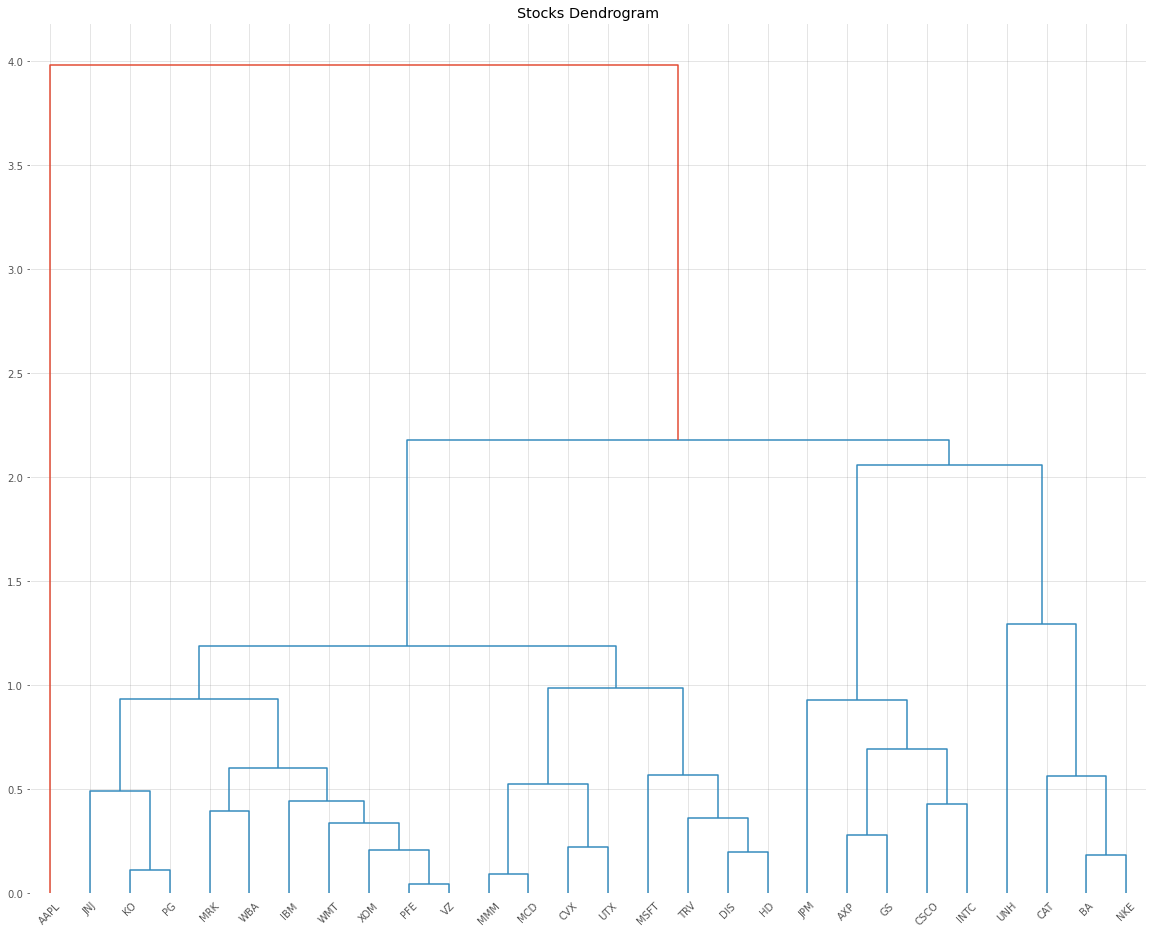

In [43]:
plt.figure(figsize = (20,16))

plt.title('Stocks Dendrogram')

dendrogram(Z, labels = X.index)

plt.show()

### The stocks with most correlation are PFE (Pfizer) and VZ (Verizon) while the least correlated are AAPL and any of the others??? this is using the unweighted average method and you might get different dendrogram with ward or min squares etc.



## <font color = blue> 👉 Questions 3 to 7 ask you to build, execute, and backtest a strategy, using both `MACD` and `RSI`. </font>

### <font color = green> Please combine the RSI and MACD strategies and own the stock if both RSI and MACD criteria provide a signal to buy. As to RSI, you will generalize the RSI threshold values to 50.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Microsoft (`MSFT`) is our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position under a condition where RSI is below 50 and, at the same time, bullish crossover based on MACD is accomplished.
<br>
    
- Enter a short position under a condition where RSI is above 50 and, at the same time, bearish crossover based on MACD is accomplished.

### <font color = green> NOTE: The MACD crossover strategy is defined as:    
    
- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.        
<br>

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.
    
### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period 
    and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and 
    each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for 
    the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value 
    to calculate the nextaverage value by multiplying by our lookback 
    period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value 
    (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [44]:
# pulling data from yahoo

start = dt.datetime(2015, 1, 1)
end = dt.datetime(2017, 12, 31)

MSFT = pdr.get_data_yahoo('MSFT', start, end)
data = MSFT.iloc[1:].drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis = 1)
data['Daily Change'] = data['Adj Close'].diff()
data['Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [45]:
data.head()

,Adj Close,Daily Change,Returns
Date,,,
2015-01-02,40.926445,NaN,NaN
2015-01-05,40.550095,-0.376350,-0.009238
2015-01-06,39.954922,-0.595173,-0.014786
2015-01-07,40.462570,0.507648,0.012625
2015-01-08,41.652901,1.190331,0.028994


-----------------------------------------

# For MACD strategy

<AxesSubplot:xlabel='Date'>

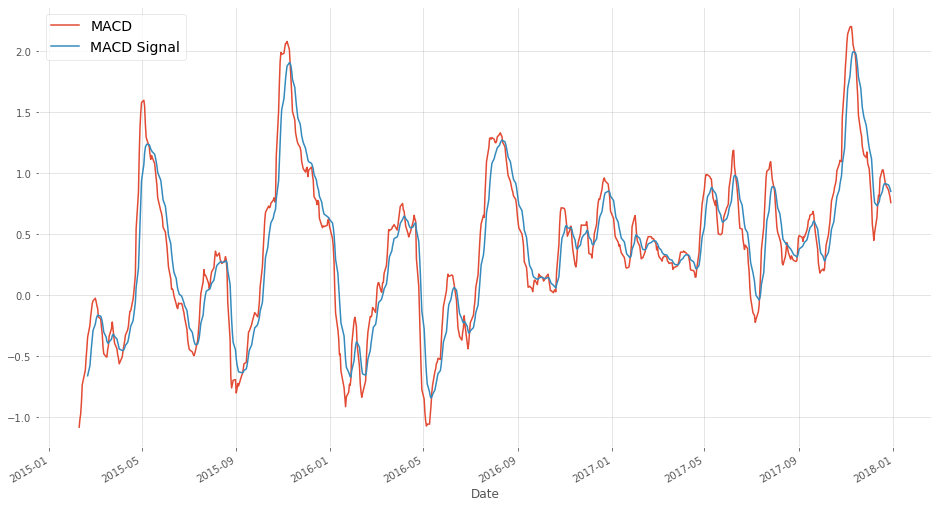

In [46]:
# define MACD and signal line
data['MACD'] = data['Adj Close'].ewm(span = 12, adjust = False, min_periods = 12).mean() \
                -data['Adj Close'].ewm(span = 26, adjust = False, min_periods = 26).mean()
data['MACD Signal'] = data.MACD.ewm(span = 9, adjust = False, min_periods = 9).mean()

data[['MACD', 'MACD Signal']].plot(figsize = (16, 9))

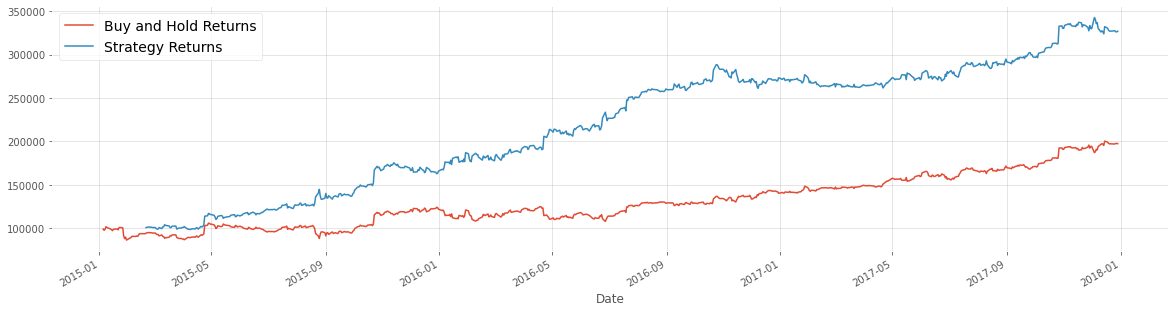

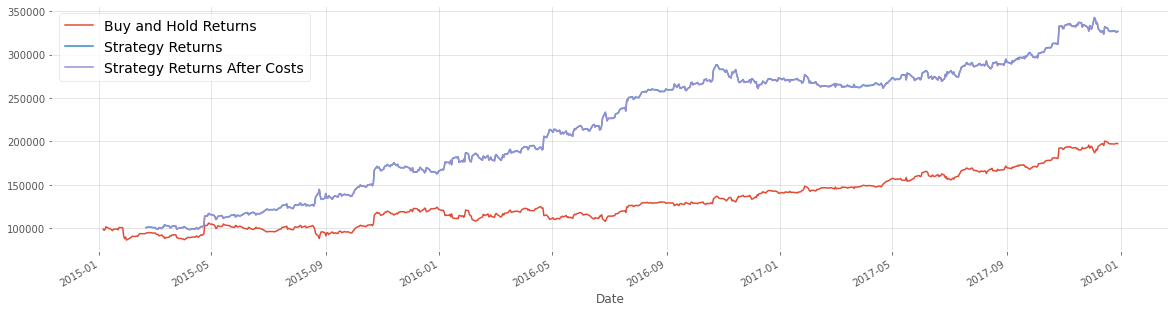

In [47]:
# for the MACD strategy
MACD_bot = data.copy()

MACD_bot['POS'] = np.where( MACD_bot.MACD > MACD_bot['MACD Signal'], 1, np.nan)
MACD_bot['POS'] = np.where( MACD_bot.MACD < MACD_bot['MACD Signal'], -1, MACD_bot['POS'])
#MACD_bot.POS.value_counts()

MACD_bot['Turnover'] = np.where(MACD_bot['POS'] * MACD_bot['POS'].shift(1) > 0, 0, 1) # 1 means posistion reversion
#MACD_bot.Turnover.value_counts() #1 for 2, 63 for 1, 66 for -1

MACD_bot['Commissions'] = abs(MACD_bot ['Turnover']) * 5
MACD_bot['Strategy'] = MACD_bot.POS * MACD_bot.Returns

INITIAL_CAPITAL = 100000

equity_MACD = MACD_bot[['Returns', 'Strategy']].cumsum().apply(np.exp) * INITIAL_CAPITAL
equity_MACD.columns = ["Buy and Hold Returns", "Strategy Returns"]
#equity.fillna(INITIAL_CAPITAL, inplace=True)
equity_MACD.plot(figsize=(20,5))

equity_MACD['Strategy Returns After Costs'] = equity_MACD['Strategy Returns'] - MACD_bot['Commissions'].cumsum()
equity_MACD.plot(figsize=(20,5))

MACD_bot['Strategy w/ Costs'] = np.log(equity_MACD['Strategy Returns After Costs']).diff()

# For RSI  strategy

 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period 
    and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and 
    each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for 
    the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value 
    to calculate the nextaverage value by multiplying by our lookback 
    period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value 
    (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

In [48]:
RSI= data.copy()
#RSI.iloc[1:]
window_length=14

#MSFT['diff']=MSFT['close'].diff()

RSI['gain']=RSI['Daily Change'].clip(lower=0)
RSI['loss']=RSI['Daily Change'].clip(upper=0).abs()


RSI['avg gain']=RSI['gain'].rolling(window=window_length,min_periods=window_length).mean()[:window_length+1]
RSI['avg loss']=RSI['loss'].rolling(window=window_length,min_periods=window_length).mean()[:window_length+1]

# Average Gains
for i, row in enumerate(RSI['avg gain'].iloc[window_length+1:]):
    RSI['avg gain'].iloc[i + window_length + 1] =\
        (RSI['avg gain'].iloc[i + window_length] *
         (window_length - 1) +
         RSI['gain'].iloc[i + window_length + 1])\
        / window_length
    
    
# Average Losses
for i, row in enumerate(RSI['avg loss'].iloc[window_length+1:]):
    RSI['avg loss'].iloc[i + window_length + 1] =\
        (RSI['avg loss'].iloc[i + window_length] *
         (window_length - 1) +
         RSI['loss'].iloc[i + window_length + 1])\
        / window_length
    
# Calculate RS Values
RSI['RS'] = RSI['avg gain'] / RSI['avg loss']


# Calculate RSI
RSI['RSI'] = 100 - (100 / (1.0 + RSI['RS']))
data['RSI'] = RSI['RSI']

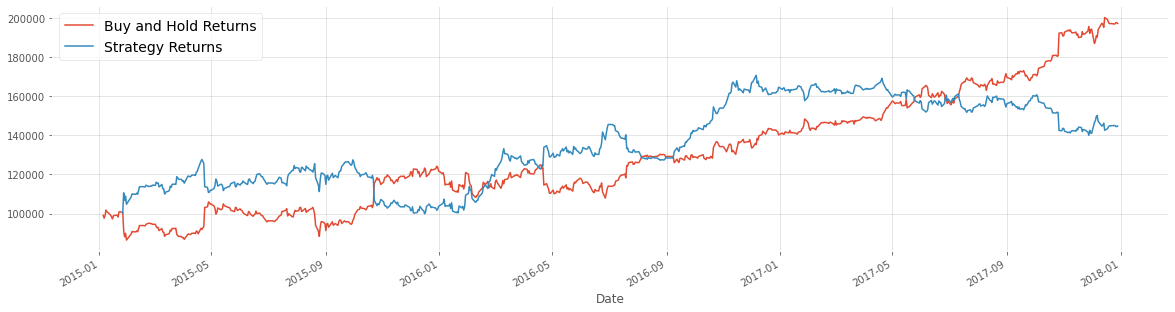

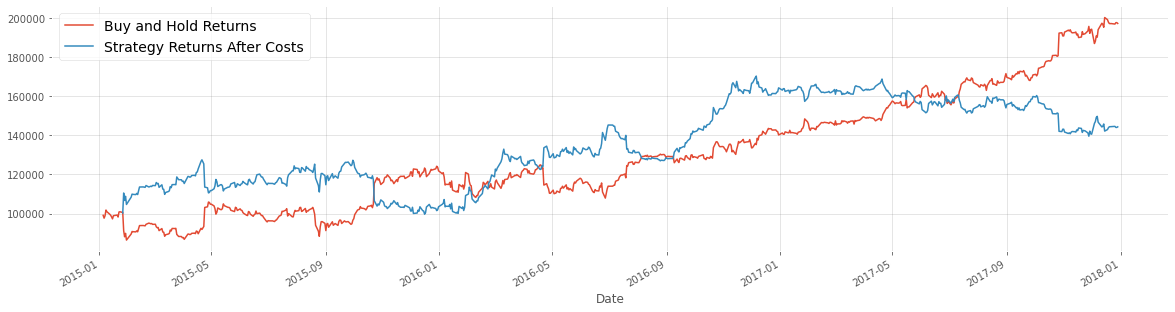

In [49]:
RSI_bot = data.copy()

RSI_bot['POS'] = np.where( RSI_bot.RSI < 50, 1, np.nan)
RSI_bot['POS'] = np.where( RSI_bot.RSI > 50, -1, RSI_bot['POS'])

RSI_bot['Turnover'] = np.where(RSI_bot['POS'] * RSI_bot['POS'].shift(1) > 0, 0, 1) # 1 means posistion reversion

RSI_bot['Commissions'] = abs(MACD_bot ['Turnover']) * 5
RSI_bot['Strategy'] = RSI_bot.POS.shift(1) * RSI_bot.Returns

INITIAL_CAPITAL = 100000

equity_RSI = RSI_bot[['Returns', 'Strategy']].cumsum().apply(np.exp) * INITIAL_CAPITAL
equity_RSI.columns = ["Buy and Hold Returns", "Strategy Returns"]
equity_RSI.plot(figsize=(20,5))

equity_RSI['Strategy Returns After Costs'] = equity_RSI['Strategy Returns'] - RSI_bot['Commissions'].cumsum()
equity_RSI[["Buy and Hold Returns", 'Strategy Returns After Costs']].plot(figsize=(20,5))


RSI_bot['Strategy w/ Costs'] = np.log(equity_RSI['Strategy Returns After Costs']).diff()


# For the combined strategy

Enter a long position under a condition where RSI is below 50 and, at the same time, bullish crossover based on MACD is accomplished.


Enter a short position under a condition where RSI is above 50 and, at the same time, bearish crossover based on MACD is accomplished.

- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.        
<br>

### Visualize your buy and sell positions.

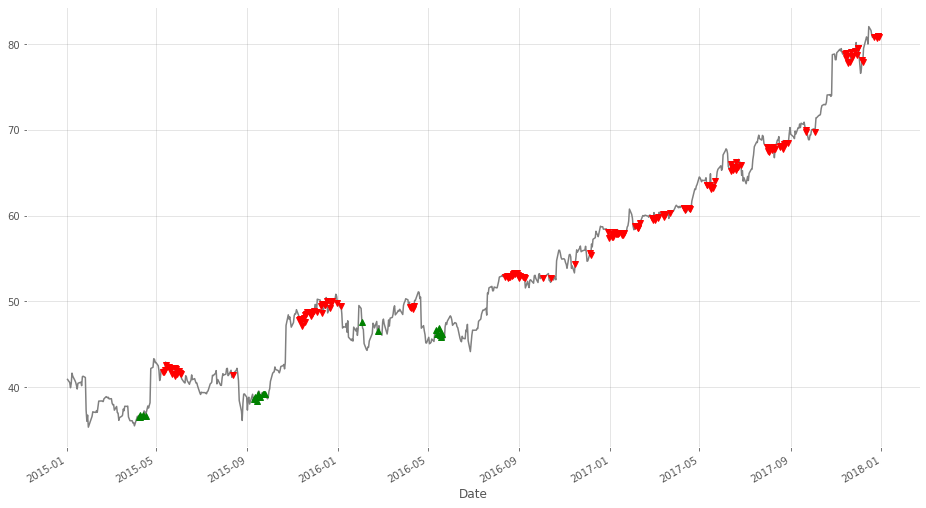

In [50]:
combined_bot = data.copy()

# Spot long and short positions 

combined_bot['POS'] = np.where( (combined_bot.MACD > combined_bot['MACD Signal']) & (combined_bot.RSI < 50) & \
                               (combined_bot.MACD > combined_bot.MACD.shift(1)), 1, 0)
combined_bot['POS'] = np.where( (combined_bot.MACD < combined_bot['MACD Signal']) & (combined_bot.RSI > 50) & \
                               (combined_bot.MACD < combined_bot.MACD.shift(1)), -1, combined_bot['POS'])


#Finnally, Visualize your buy and sell positions

combined_bot['Adj Close'].plot(figsize = (16, 9), color = 'grey')


plt.plot(combined_bot[combined_bot.POS == 1].index,
         combined_bot[combined_bot.POS == 1]['Adj Close'],
        'g^',
        )

plt.plot(combined_bot[combined_bot.POS == -1].index,
         combined_bot[combined_bot.POS == -1]['Adj Close'],
        'rv',
        )


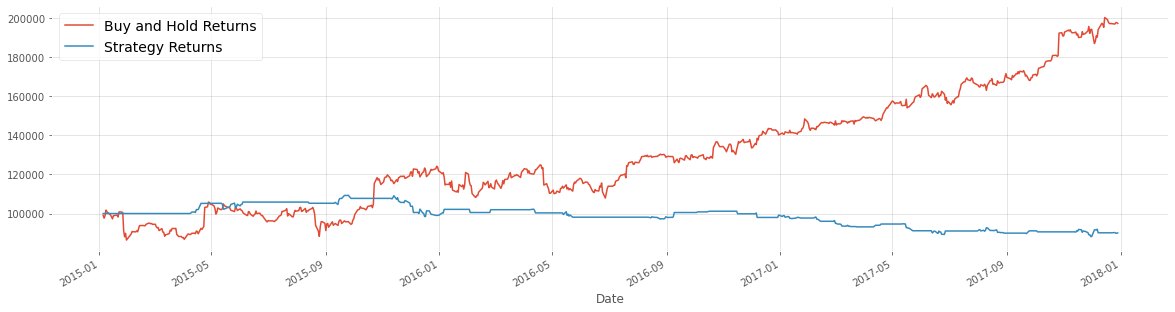

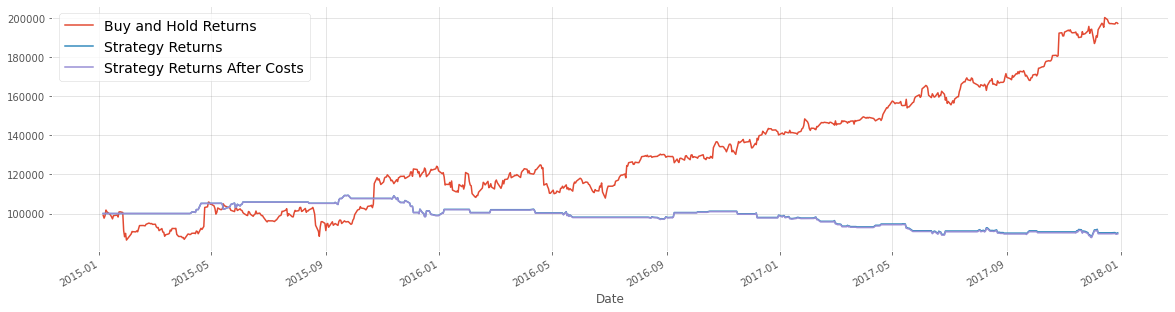

In [51]:
combined_bot ['Turnover'] = combined_bot.POS - combined_bot.POS.shift(1)


combined_bot['Commissions'] = abs(combined_bot ['Turnover']) * 5
combined_bot['Strategy'] = combined_bot.POS.shift(1) * combined_bot.Returns

INITIAL_CAPITAL = 100000

equity_combined = combined_bot[['Returns', 'Strategy']].cumsum().apply(np.exp) * INITIAL_CAPITAL
equity_combined.columns = ["Buy and Hold Returns", "Strategy Returns"]
equity_combined.plot(figsize=(20,5))

equity_combined['Strategy Returns After Costs'] = equity_combined['Strategy Returns'] - combined_bot['Commissions'].cumsum()
equity_combined.plot(figsize=(20,5))

combined_bot['Strategy w/ Costs'] = np.log(equity_combined['Strategy Returns After Costs']).diff()

### <font color = red> Answer 3 is presented in the cell below: </font>

### <font color = blue> 👉 Question 4</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

In [52]:
RSI_bot.tail()

,Adj Close,Daily Change,Returns,MACD,MACD Signal,RSI,POS,Turnover,Commissions,Strategy,Strategy w/ Costs
Date,,,,,,,,,,,
2017-12-22,80.752983,0.009460,0.000117,0.911110,0.913744,57.972944,-1.0,0,5,-0.000117,-0.000152
2017-12-26,80.649101,-0.103882,-0.001287,0.860171,0.903030,57.238639,-1.0,0,0,0.001287,0.001291
2017-12-27,80.941856,0.292755,0.003623,0.833813,0.889186,58.821600,-1.0,0,0,-0.003623,-0.003635
2017-12-28,80.951294,0.009438,0.000117,0.804412,0.872231,58.874453,-1.0,0,0,-0.000117,-0.000117
2017-12-29,80.781303,-0.169991,-0.002102,0.758650,0.849515,57.444252,-1.0,0,0,0.002102,0.002109


In [53]:
RSI_bot[['Strategy w/ Costs']].sum().apply(np.exp)

Strategy w/ Costs    1.440009
dtype: float64

### <font color = red> Answer 4 </font>

    The answer is 144 % .

### <font color = blue> 👉 Question 5</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

<AxesSubplot:xlabel='Date'>

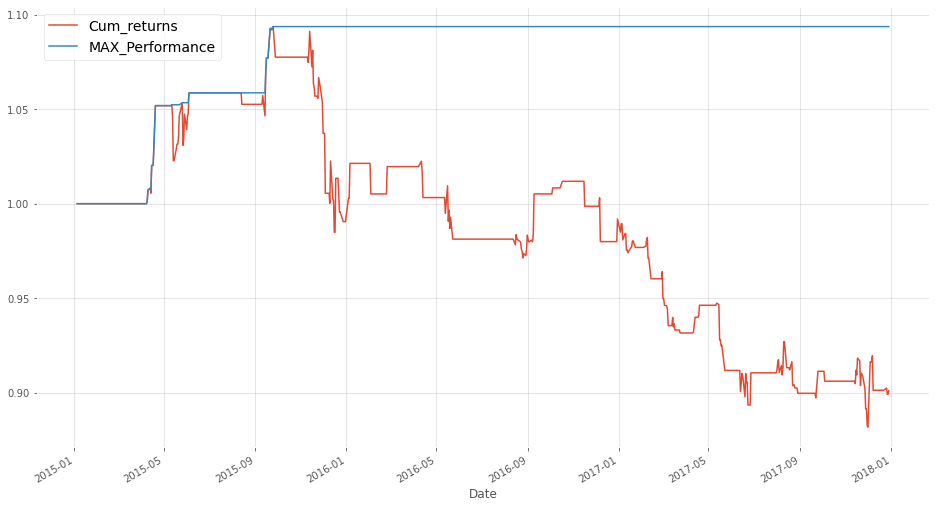

In [54]:
data5 = combined_bot.copy()

data5["Cum_returns"] = data5["Strategy"].cumsum().apply(np.exp)
data5["MAX_Performance"] = data5["Cum_returns"].cummax()  #the max until date
data5['Drawdown'] = data5["MAX_Performance"] - data5["Cum_returns"]

data5[["Cum_returns", "MAX_Performance"]
        ].dropna().plot(figsize = (16,9))


In [55]:
def Drawdowns(RSIdf):  
      
    # spot the corresponding index everytime the MAX_Performance achieved    
    index = RSIdf[RSIdf['Drawdown'] == 0].index  
  
    a = []  
  
    for i in range(1,len(index)):
        #Calculate the length of 2 max_performance
        period = index[i].to_pydatetime() - index[i-1].to_pydatetime()
        # spot the max Drawdown value inbetween 2 max_performance
        max_drawdown = RSIdf.loc[index[i-1]:index[i],'Drawdown'].max()  
        a.append([period,max_drawdown,index[i-1],index[i]])  #put it into a list
      
    df1 = pd.DataFrame(a,columns=['Period','Max Drawdown','Beginning','End']).sort_values('Max Drawdown',ascending=False)  
  
    return df1.head(5)

In [56]:
Drawdowns(data5)

,Period,Max Drawdown,Beginning,End
87,14 days,0.029592,2015-05-12,2015-05-26
88,9 days,0.022569,2015-05-26,2015-06-04
138,33 days,0.012160,2015-08-13,2015-09-15
67,2 days,0.002656,2015-04-13,2015-04-15
144,2 days,0.000747,2015-09-22,2015-09-24


### <font color = red> Answer 5 </font>

    The Worst drawdown period     : Net drawdown 2.9 % | Duration 14 Days
    
    The 2nd worst drawdown period : Net drawdown 2.2 % | Duration 9 Days
     
    The 3rd worst drawdown period : Net drawdown 1.2 % | Duration 33 Days
         
    The 4th worst drawdown period : Net drawdown 0.27 % | Duration 2 Days
    
    The 5th worst drawdown period : Net drawdown 0.07 % | Duration 2 Days

### <font color = blue> 👉 Question 6</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [57]:
data6 = combined_bot.copy()
Avg_Annual_Returns = (np.exp(data6["Strategy w/ Costs"].groupby(data6.index.year).sum()
                            )-1
                     ).mean()  #w/ mean
Avg_Annual_Returns

-0.03501113618971907

In [58]:
Annualized_Returns = np.exp(data6["Strategy w/ Costs"].groupby(data6.index.year).sum()
                           )-1 # w/o mean
Annualized_Returns

Date
2015   -0.010950
2016    0.000297
2017   -0.094380
Name: Strategy w/ Costs, dtype: float64

### <font color = red> Answer 6 </font>

    Below average year(s) are : 2017
    
    Above average year(s) is : 2015, 2016 
     

###  <font color = blue> 👉 Question 7. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [59]:
data7 = combined_bot.copy()

# def sharpe_ratio(RSIdf, periods_per_year = 252): 
     
#     n_years = RSIdf.shape[0]/periods_per_year 
     
#     annualized_return = np.power(np.prod(1 + RSIdf['Strategy']), (1 / n_years) 
#                                  ) - 1 
     
#     annualized_vol = RSIdf['Strategy'].std() * np.sqrt(periods_per_year) 
     
#     annualized_sharpe = annualized_return / annualized_vol 
     
#     return annualized_sharpe

In [60]:
annualized_sharpe = data7["Strategy w/ Costs"].mean()/data7["Strategy"].std() * np.sqrt(252)
annualized_sharpe

-0.46934136151723005

### <font color = red> Answer 7 </font>
    
    Sharpe ratio: -0.47
    

###  <font color = blue> 👉 Question 8. </font> Please compare the above Sharpe ratio deploying RSI-MACD combined strategy, relative to the Sharpe ratio utilizing MACD strategy only. Which investment strategy performs better based on the Sharpe ratio?

### Below are the lines of code that lead to an answer:

In [61]:
data8 = MACD_bot.copy()
data8["Strategy w/ Costs"].mean()/data8["Strategy"].std() * np.sqrt(252)

1.9073090763840819

### <font color = red> Answer 8 </font>
    
    MACD strategy performs better.
    

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊